In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
pd.options.display.max_rows = 500

# Spotify

The script below allows you to scrape the weekly top 200 tracks on Spotify for any country using its repsective two letter code.

The default date range is for the latest available data on the Spotify website. However this can be adjusted if needed using the 'spot_date' parameter in the function below.

Example format for 'spot_date' argument for week ending July 31st would be: '2020-07-24--2020-07-31' 

In [64]:
def get_spotify_data(region,spot_date='latest'):
    spotify_url = "https://spotifycharts.com/regional/{0}/weekly/{1}".format(region,spot_date)
    print(spotify_url)
    response = requests.get(spotify_url) 
    content = response.content
    parser = BeautifulSoup(content,'html.parser')
    
    #Information About Chart
    country = parser.select("div .responsive-select-value") [0].text
    cadence = parser.select("div .responsive-select-value") [1].text
    data_as_of = parser.select("div .responsive-select-value") [2].text
    print(country)
    print(cadence)
    print(data_as_of)
    
    #Getting Track Names
    parser.select(" strong")
    #Getting Artist Name
    parser.select(".chart-table-track span")
    #Getting Stream Count
    parser.select(".chart-table-streams")

    trackname = []
    artistname = []
    streams = []
        
    for i in range(0,200):
        trackname.append(parser.select(".chart-table-track strong")[i].text)
        artistname.append(parser.select(".chart-table-track span")[i].text)
        streams.append(parser.select(".chart-table-streams")[i+1].text)
        spot_result = pd.DataFrame({'Track':trackname,'Artist': artistname,'Streams':streams})

    spot_result["Artist"] = spot_result["Artist"].str.replace('by','').str.strip()
    spot_result["Country"] = region.upper()
    spot_result["Chart Type"] = "Top 200"
    spot_result["Week Ending"] = data_as_of
    spot_result.index = range(1,201)
    
    return spot_result

## USA - Current Top 200

In [65]:
spot_us = get_spotify_data('us')

https://spotifycharts.com/regional/us/weekly/latest
United States
weekly
08/06/2020


In [66]:
spot_us

,Track,Artist,Streams,Country,Chart Type,Week Ending
1,ROCKSTAR (feat. Roddy Ricch),DaBa,"8,316,556",US,Top 200,08/06/2020
2,my future,Billie Eilish,"8,019,823",US,Top 200,08/06/2020
3,Wishing Well,Juice WRLD,"7,966,062",US,Top 200,08/06/2020
4,cardigan,Taylor Swift,"7,630,081",US,Top 200,08/06/2020
5,exile (feat. Bon Iver),Taylor Swift,"7,544,931",US,Top 200,08/06/2020
6,Come & Go (with Marshmello),Juice WRLD,"7,304,408",US,Top 200,08/06/2020
7,"WHATS POPPIN (feat. DaBaby, Tory Lanez & Lil W...",Jack Harlow,"7,084,532",US,Top 200,08/06/2020
8,the 1,Taylor Swift,"6,784,621",US,Top 200,08/06/2020
9,Watermelon Sugar,Harry Styles,"5,999,126",US,Top 200,08/06/2020
10,Blueberry Faygo,Lil Mosey,"5,669,660",US,Top 200,08/06/2020


**Total Streams | USA Top 200**

In [44]:
spot_us_streams = spot_us["Streams"].str.replace(',','').astype('int').sum()
spot_us_streams

543569407

## UK - Current Top 200

In [120]:
spot_uk = get_spotify_data('gb')

https://spotifycharts.com/regional/gb/weekly/latest
United Kingdom
weekly
08/06/2020


In [121]:
spot_uk

,Track,Artist,Streams,Country,Chart Type,Week Ending
1,Head & Heart (feat. MNEK),Joel Corry,"4,067,703",GB,Top 200,08/06/2020
2,ROCKSTAR (feat. Roddy Ricch),DaBa,"2,622,930",GB,Top 200,08/06/2020
3,Savage Love (Laxed - Siren Beat),Jawsh 685,"2,546,589",GB,Top 200,08/06/2020
4,Lighter (feat. KSI),Nathan Dawe,"2,207,703",GB,Top 200,08/06/2020
5,Watermelon Sugar,Harry Styles,"2,116,502",GB,Top 200,08/06/2020
6,Breaking Me,Topic,"2,032,693",GB,Top 200,08/06/2020
7,West Ten,AJ Tracey,"1,888,826",GB,Top 200,08/06/2020
8,Blinding Lights,The Weeknd,"1,861,096",GB,Top 200,08/06/2020
9,Only You Freestyle,Headie One,"1,721,325",GB,Top 200,08/06/2020
10,Rain On Me (with Ariana Grande),Lady Gaga,"1,711,409",GB,Top 200,08/06/2020


**Total Streams | UK Top 200**

In [122]:
spot_uk_streams = spot_uk["Streams"].str.replace(',','').astype('int').sum()
spot_uk_streams

137773011

## Brazil - Current Top 200

In [114]:
spot_br = get_spotify_data('br')

https://spotifycharts.com/regional/br/weekly/latest
Brazil
weekly
08/06/2020


In [115]:
spot_br

,Track,Artist,Streams,Country,Chart Type,Week Ending
1,Oh Juliana,Niack,"5,704,574",BR,Top 200,08/06/2020
2,Desce Pro Play (PA PA PA),Mc Zaac,"4,350,762",BR,Top 200,08/06/2020
3,Investe Em Mim,Jonas Esticado,"3,548,818",BR,Top 200,08/06/2020
4,Na Raba Toma Tapão,Niack,"3,294,470",BR,Top 200,08/06/2020
5,Poesia Acústica #9: Melhor Forma,Pineapple StormTv,"3,199,095",BR,Top 200,08/06/2020
6,Ranking,Jorge & Mateus,"2,998,769",BR,Top 200,08/06/2020
7,Volta por Baixo - Ao Vivo,Henrique & Juliano,"2,938,846",BR,Top 200,08/06/2020
8,Vai Ter Que Aguentar,Mc Don Juan,"2,847,992",BR,Top 200,08/06/2020
9,Barzinho Aleatório - Ao Vivo,Zé Neto & Cristiano,"2,728,608",BR,Top 200,08/06/2020
10,Tudo Aconteceu,MC Du Black,"2,713,080",BR,Top 200,08/06/2020


**Total Streams | Brazil Top 200**

In [116]:
spot_br_streams = spot_br["Streams"].str.replace(',','').astype('int').sum()
spot_br_streams

224299656

# India - Current Top 200

In [60]:
spot_in = get_spotify_data('in')

https://spotifycharts.com/regional/in/weekly/latest
India
weekly
08/06/2020


In [61]:
spot_in

,Track,Artist,Streams,Country,Chart Type
1,G.O.A.T.,Diljit Dosanjh,"1,159,481",IN,Top 200
2,Main Tumhara,A.R. Rahman,"1,032,173",IN,Top 200
3,Shayad,Pritam,"863,580",IN,Top 200
4,Savage Love (Laxed - Siren Beat),Jawsh 685,"848,757",IN,Top 200
5,Khairiyat,Arijit Singh,"747,477",IN,Top 200
6,Dil Bechara,A.R. Rahman,"705,673",IN,Top 200
7,Chidiya,Vilen,"703,316",IN,Top 200
8,Play Date,Melanie Martinez,"678,740",IN,Top 200
9,Taare Ginn,A.R. Rahman,"653,832",IN,Top 200
10,Khulke Jeene Ka,A.R. Rahman,"645,285",IN,Top 200


**Total Streams | India Top 200**

In [41]:
spot_in_streams = spot_in["Streams"].str.replace(',','').astype('int').sum()
spot_in_streams

59213171

# Top 200 Stream Volume Comparison Across Countries

In [143]:
#Function to clean up visualization
def cleanaxes(ax):
    for i in ax:
        #removes top and right spines
        i.spines['right'].set_visible(False) 
        i.spines['top'].set_visible(False)
        i.grid(False) #removes grid

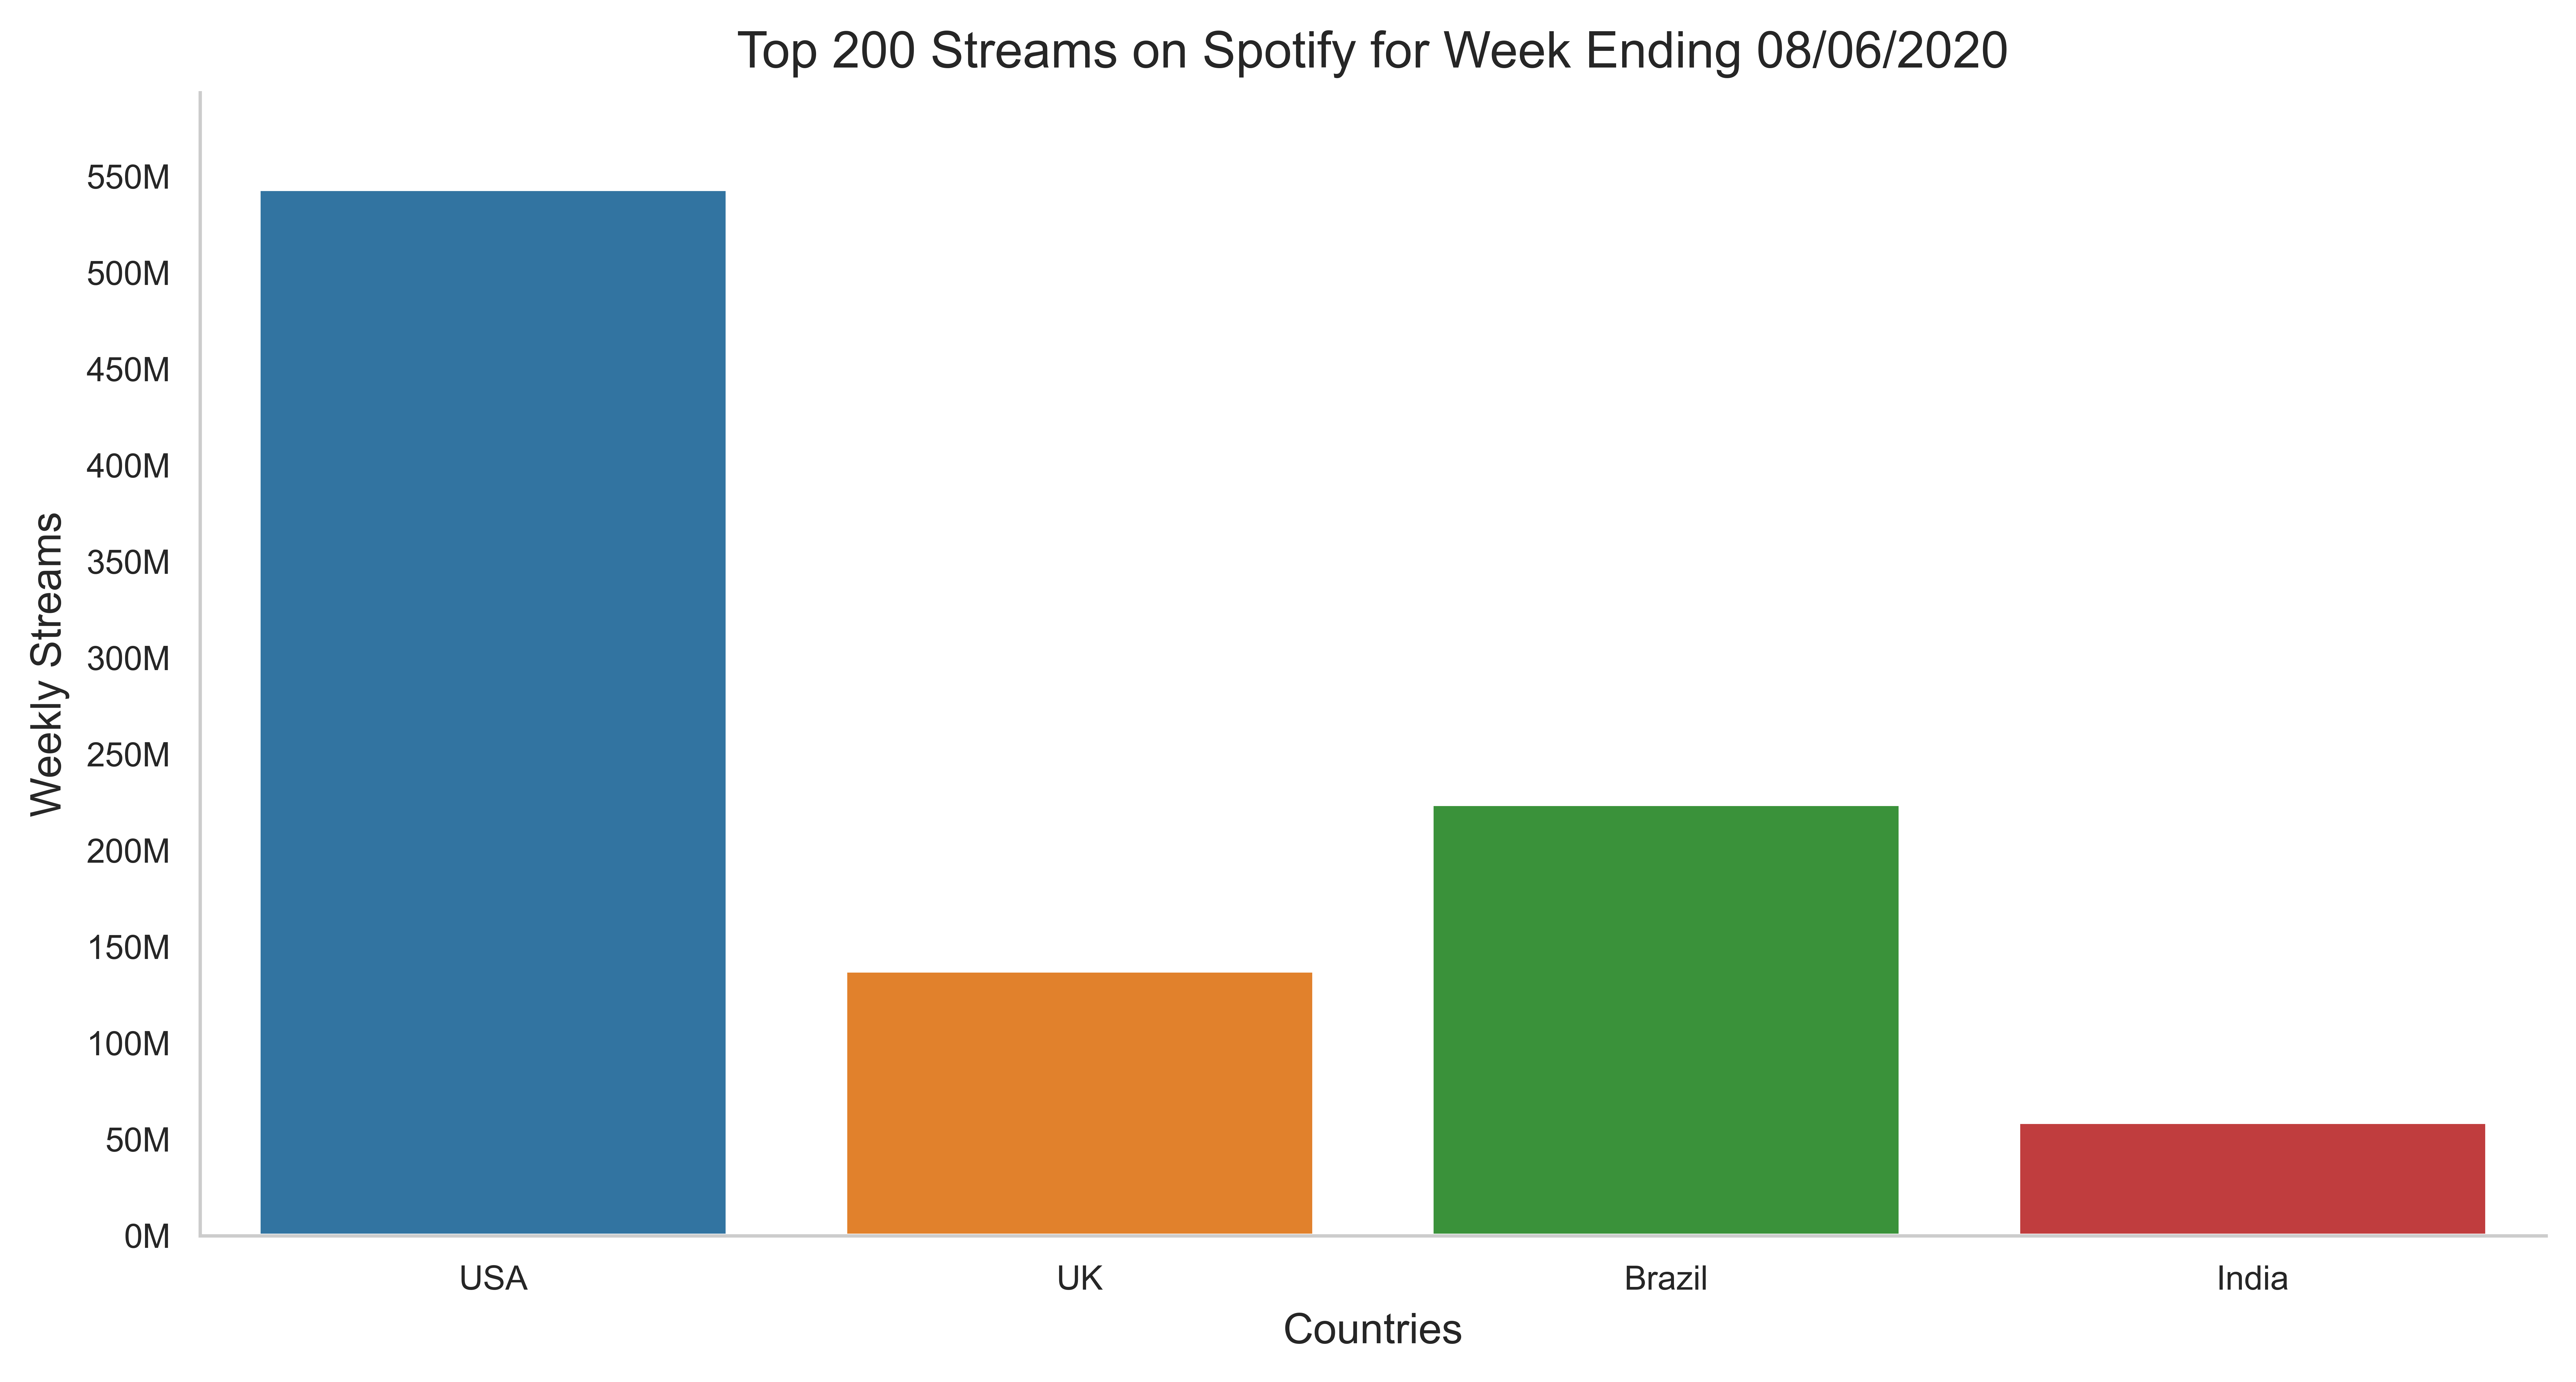

In [142]:
x = ['USA','UK','Brazil','India']
y = [spot_us_streams, spot_uk_streams, spot_br_streams, spot_in_streams]

sns.set_style('whitegrid')
fig1 = plt.figure(figsize=(10,5),dpi=1000)
ax1 = plt.subplot(1,1,1)
sns.barplot(x,y)
plt.xlabel('Countries')
plt.ylabel('Weekly Streams')
plt.title("Top 200 Streams on Spotify for Week Ending {}".format(spot_us["Week Ending"].iloc[0]))

#Y-axis clean up
upper_lim = np.max(y) + 50000000 #Max value + 50 million 
lower_lim = 0
plt.ylim(lower_lim,upper_lim)

yticks = np.arange(lower_lim,upper_lim,50000000) 
ax1.set_yticks(yticks)
ylabels=[str(int(i/1000000))+'M' for i in yticks] # List comprehension
ax1.set_yticklabels(ylabels)
ax1.tick_params(labelsize=8)
cleanaxes([ax1])